In [36]:
#Packages
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func as func
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

mkdir: cannot create directory ‘tmp/’: File exists


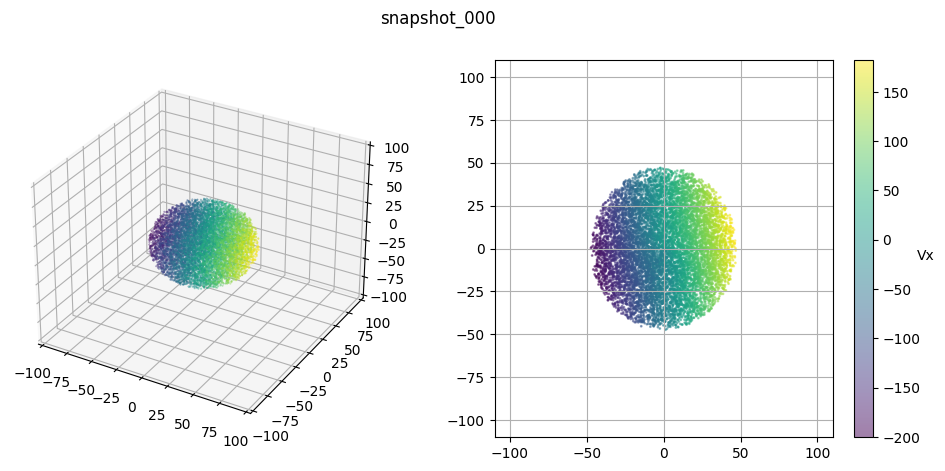

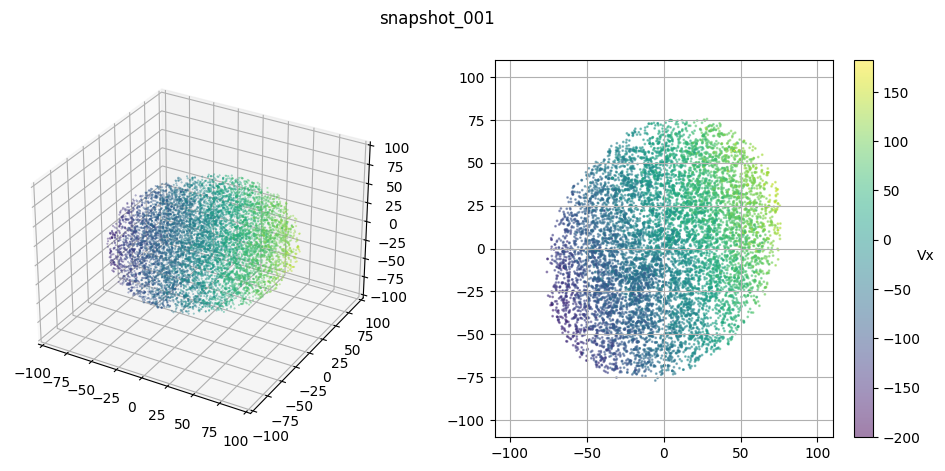

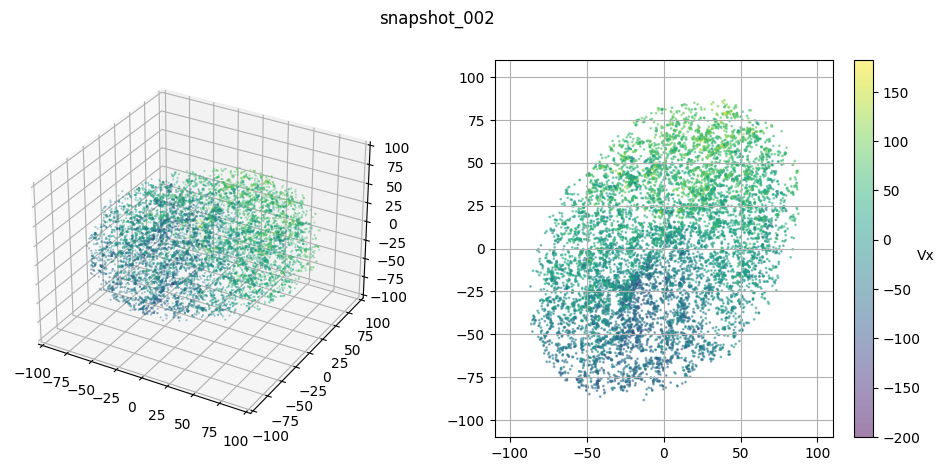

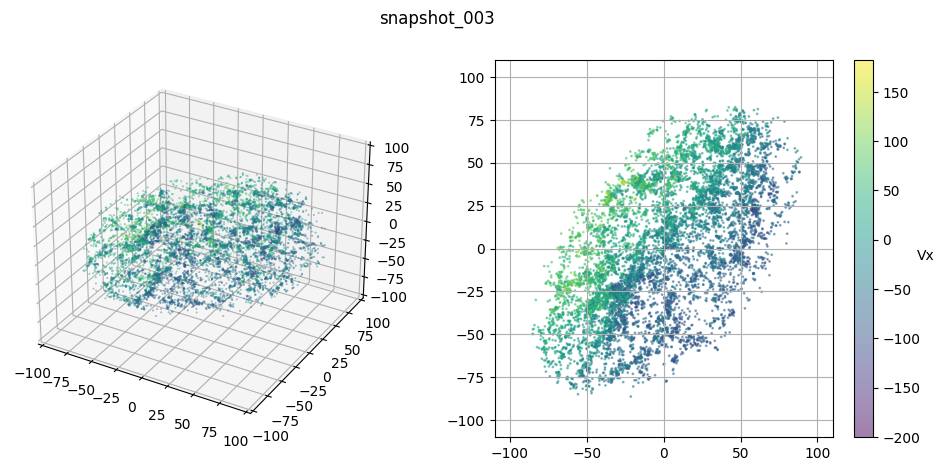

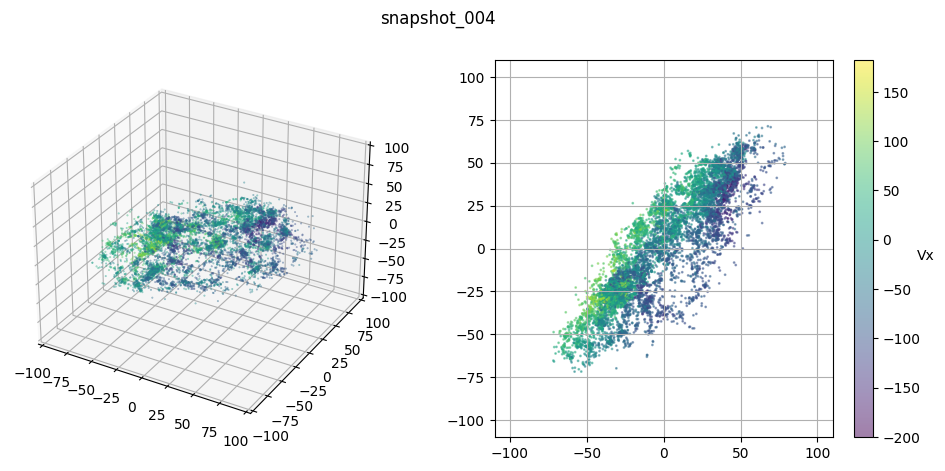

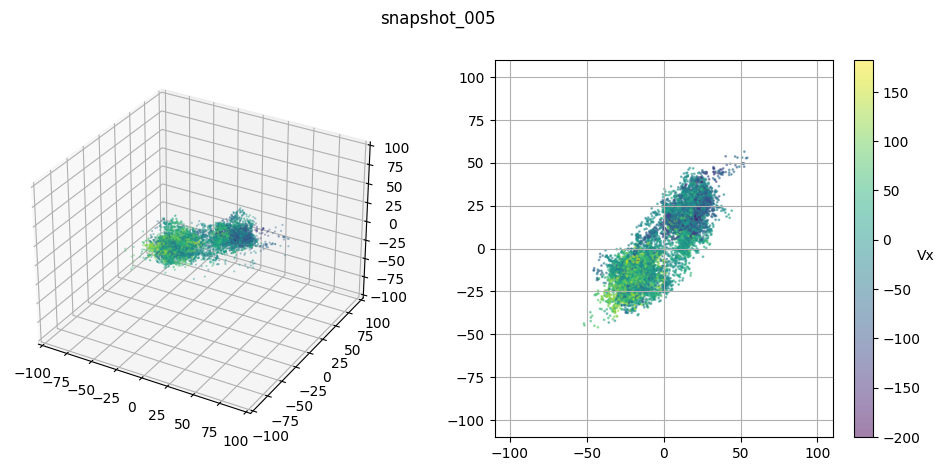

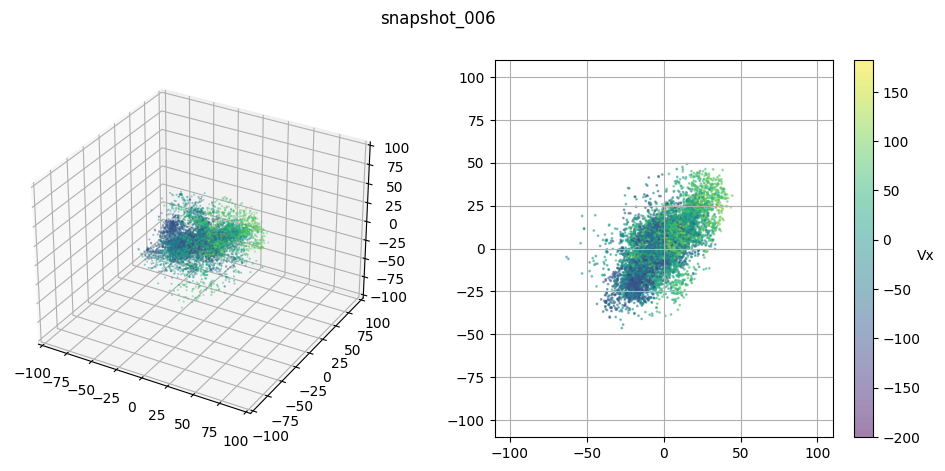

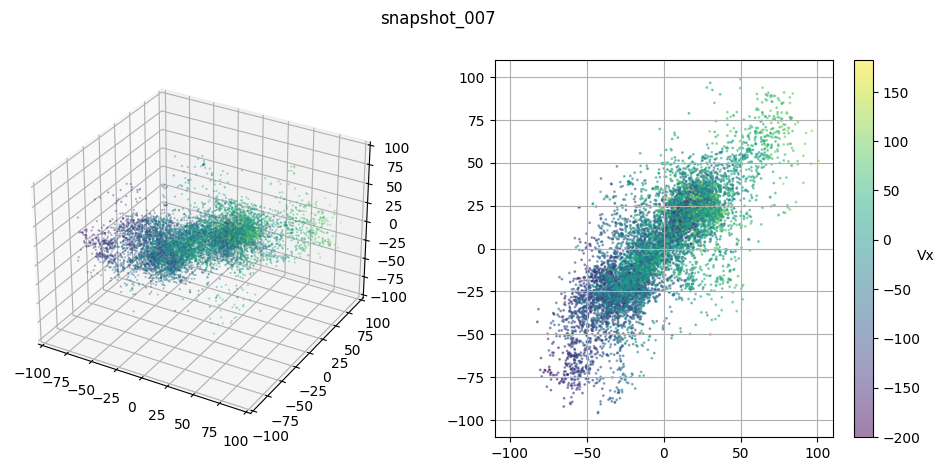

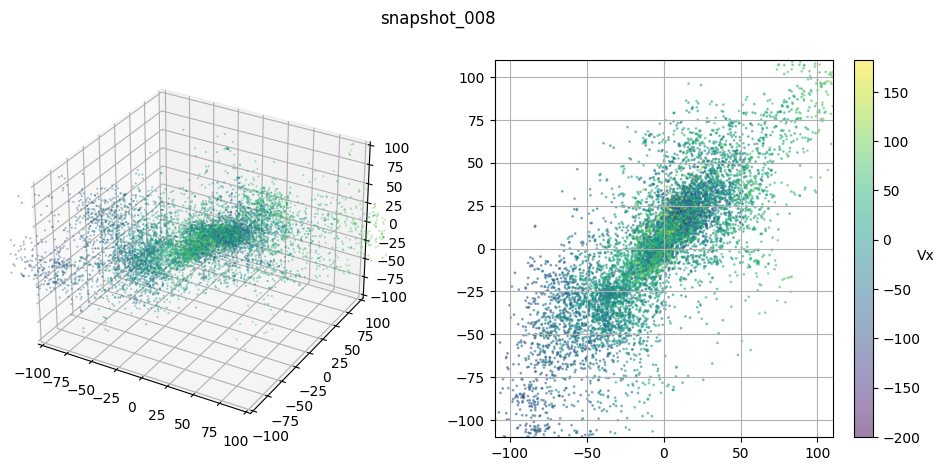

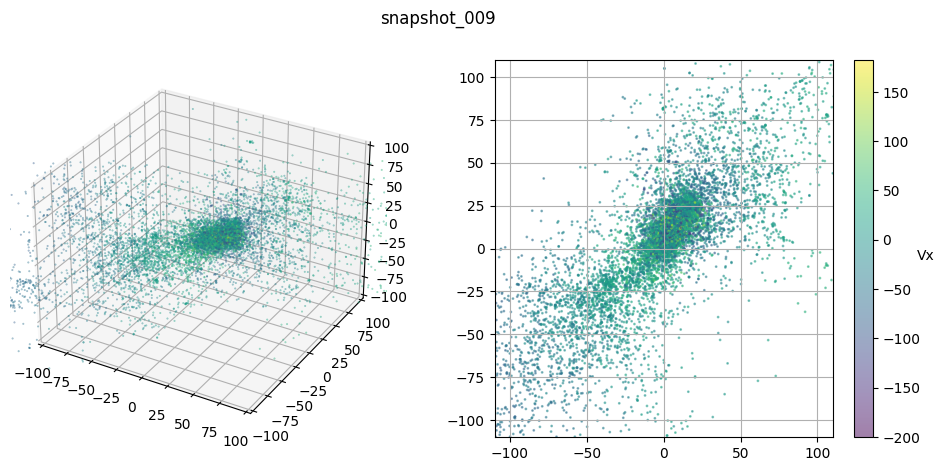

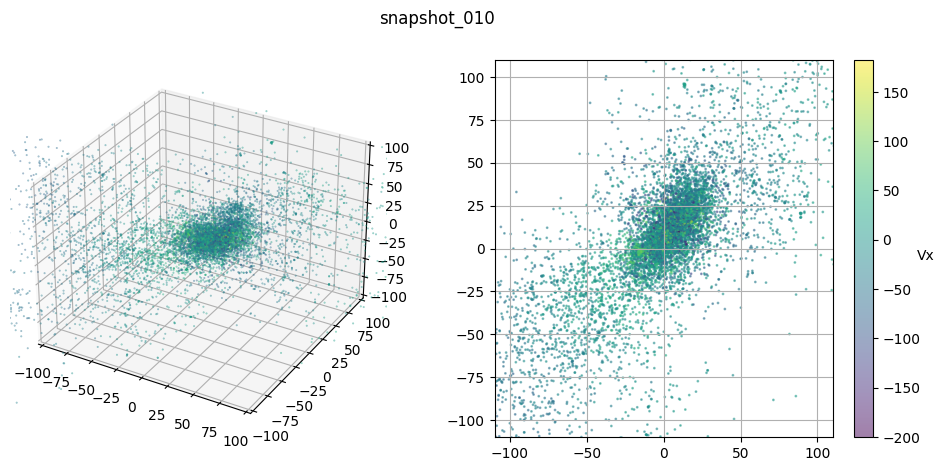

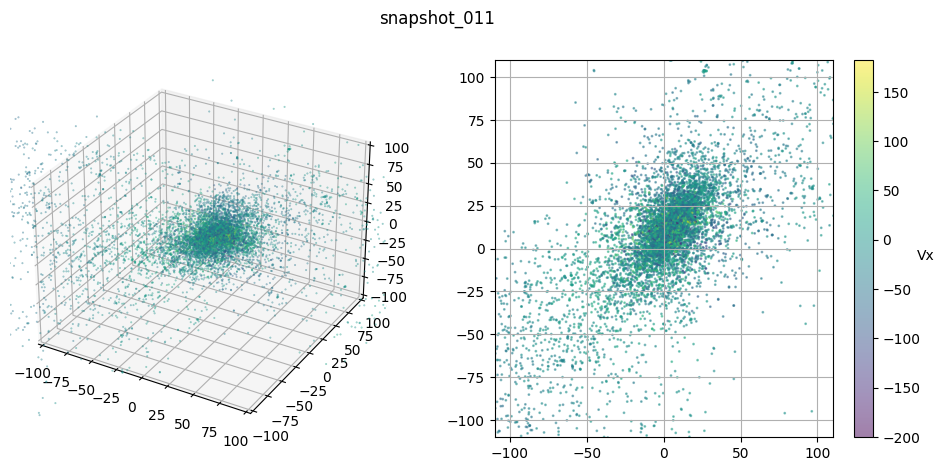

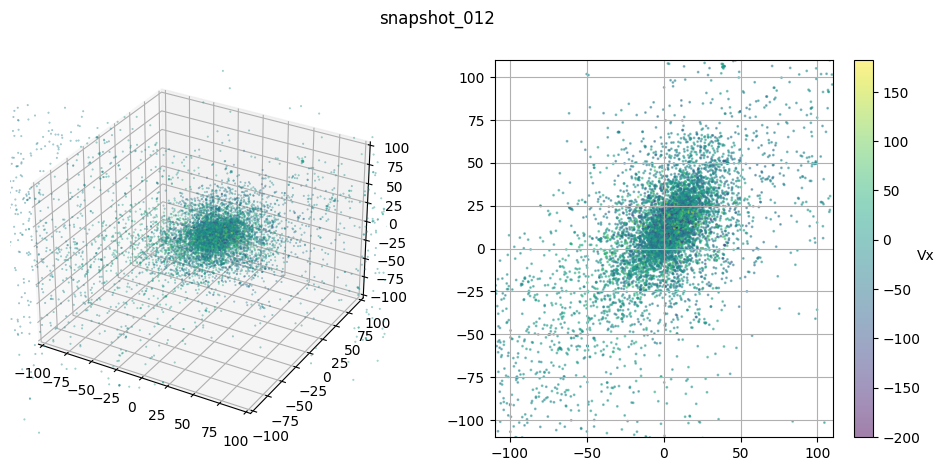

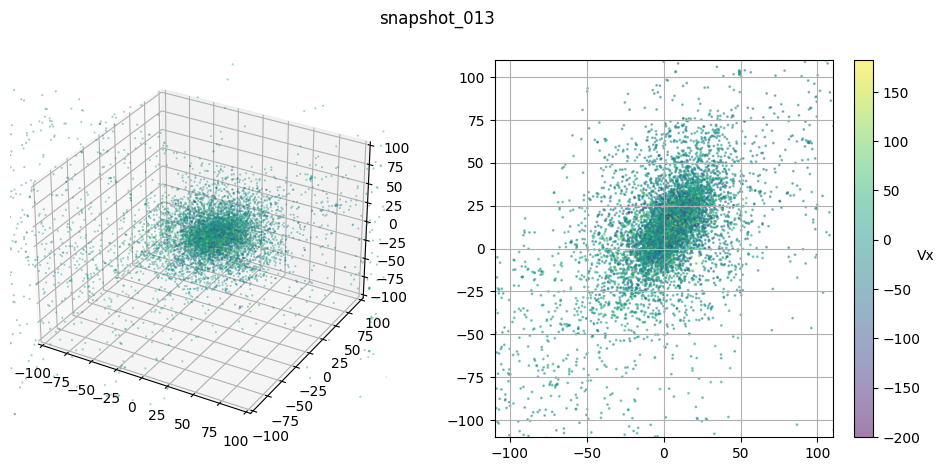

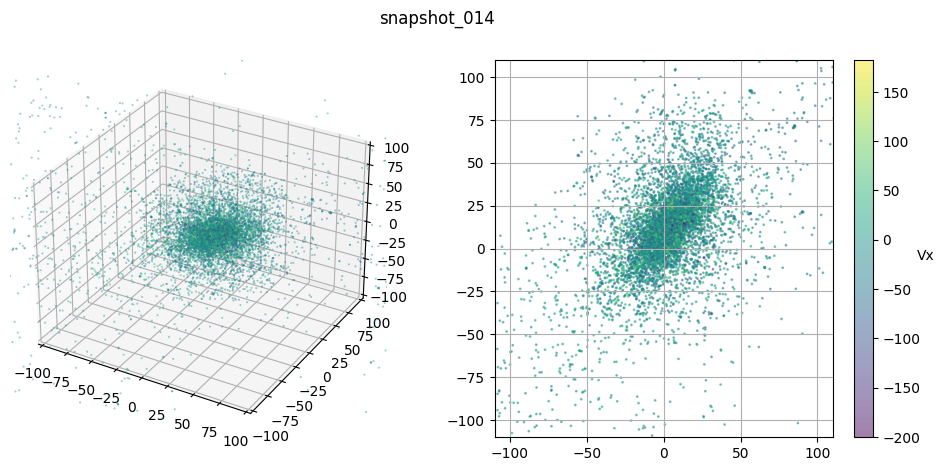

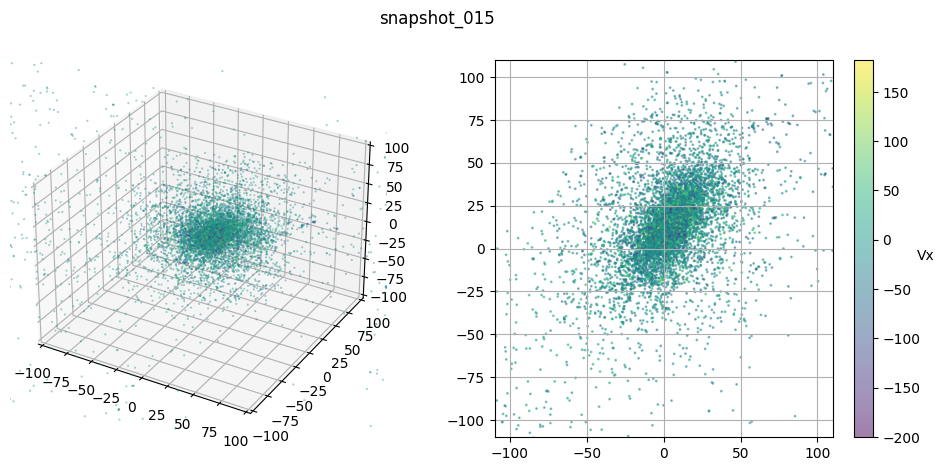

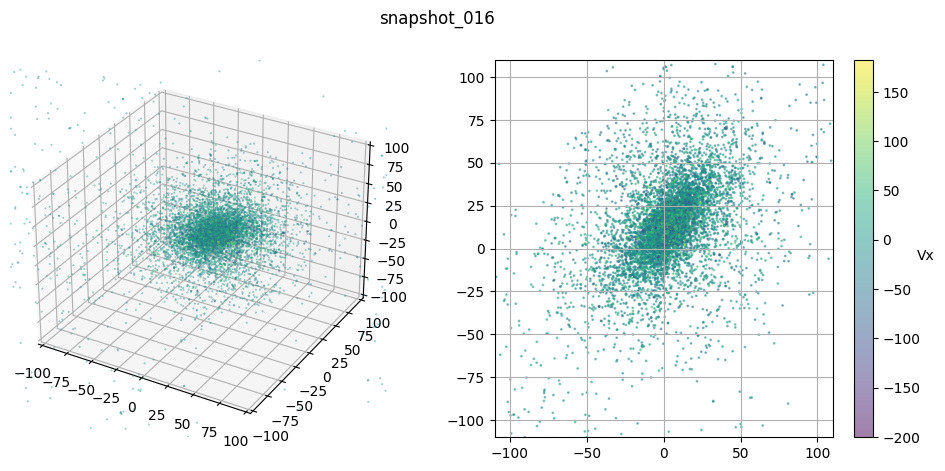

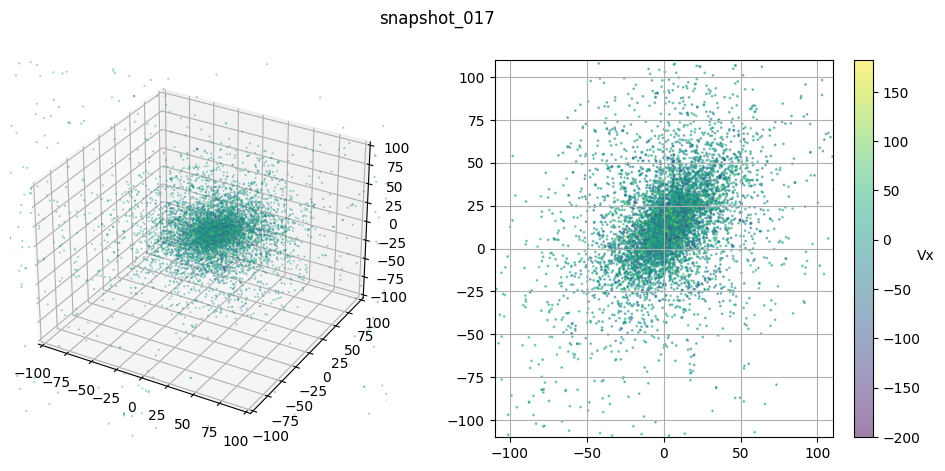

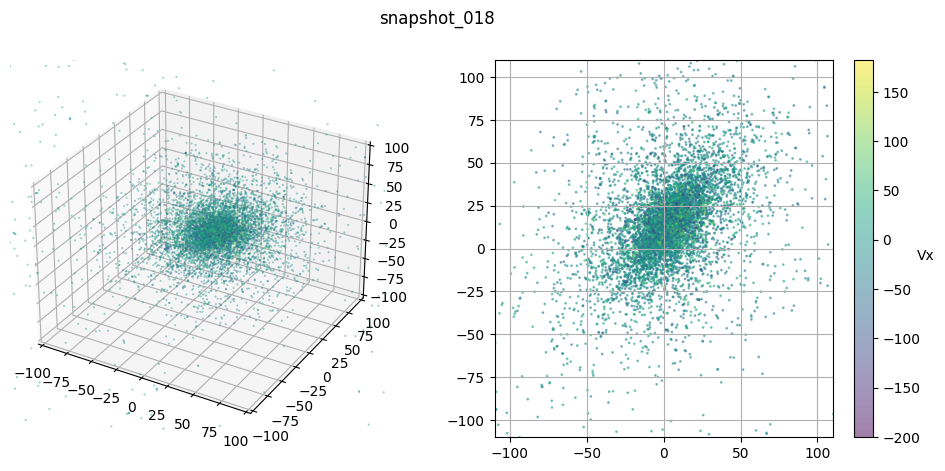

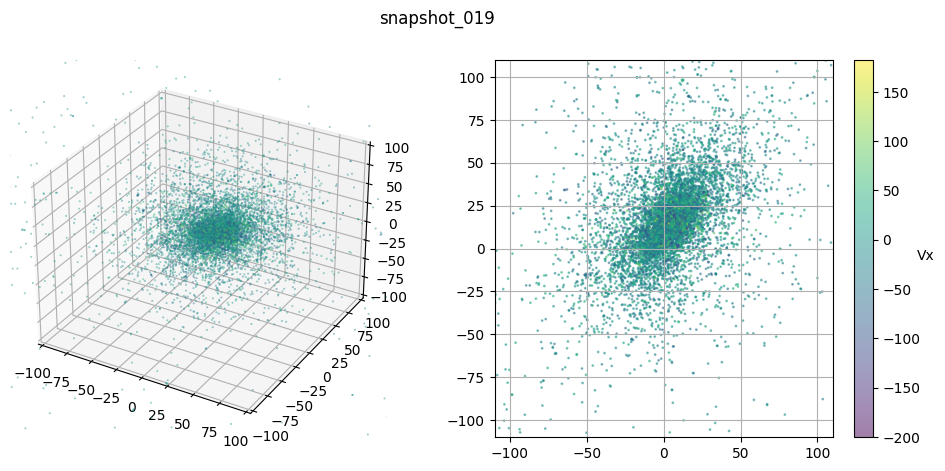

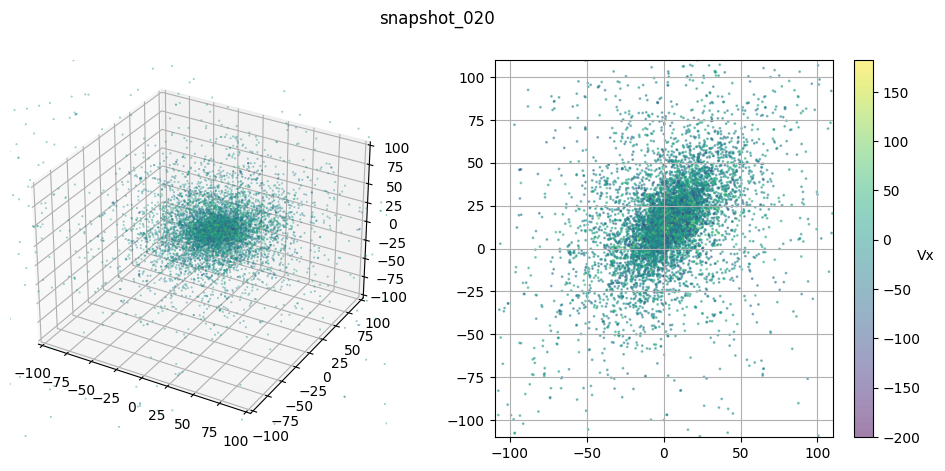

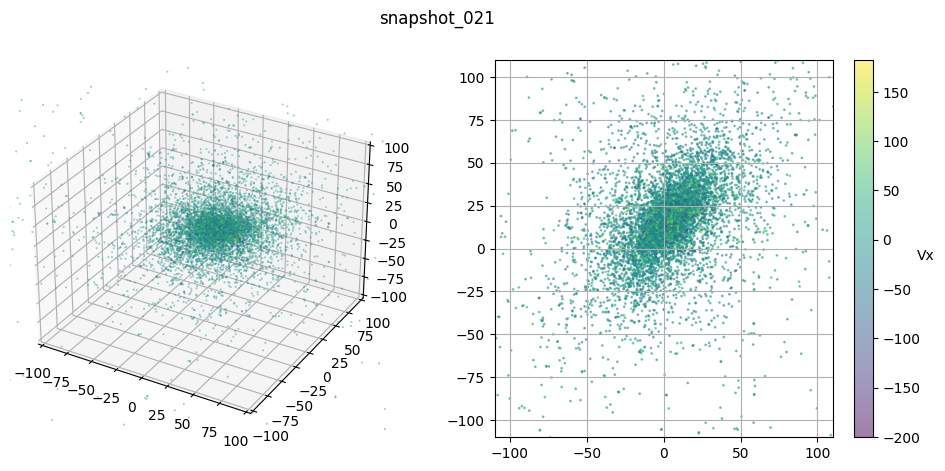

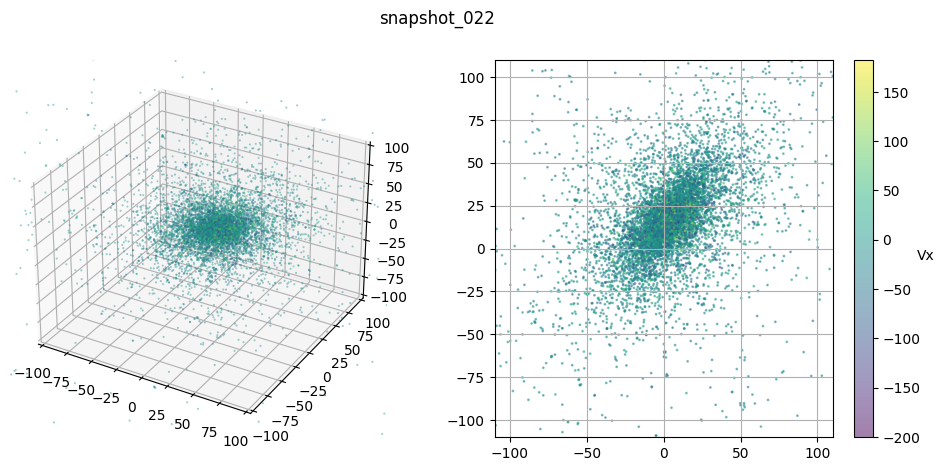

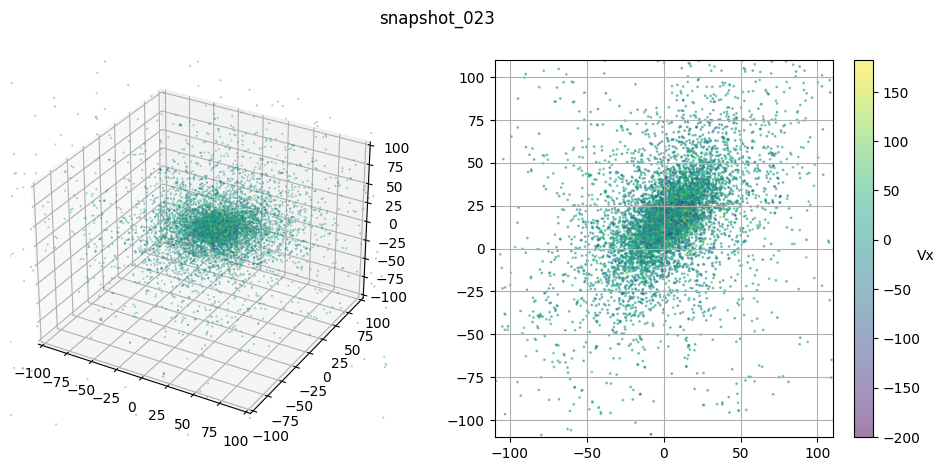

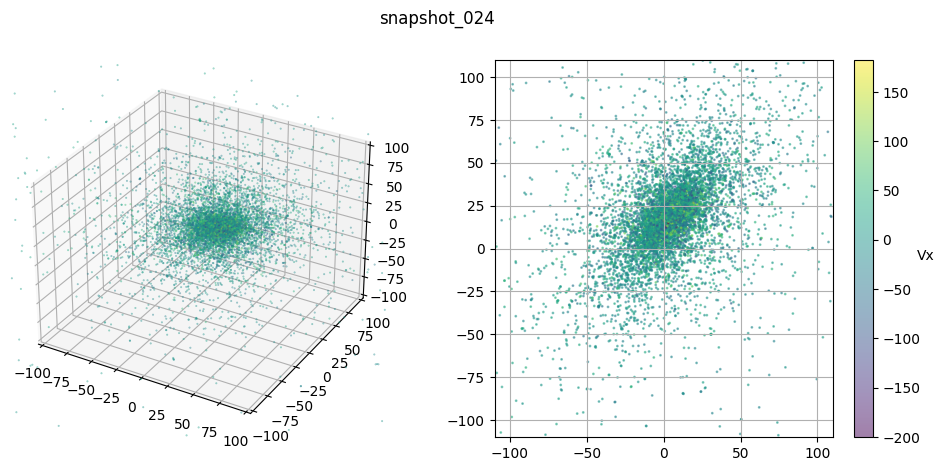

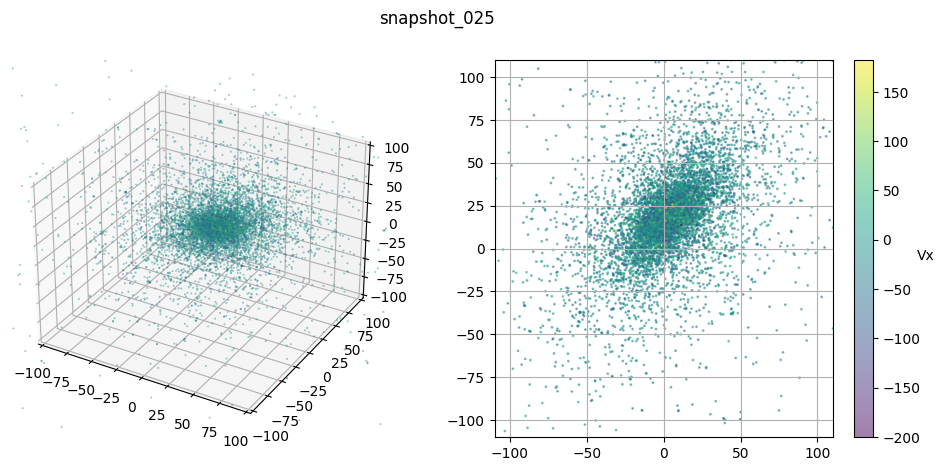

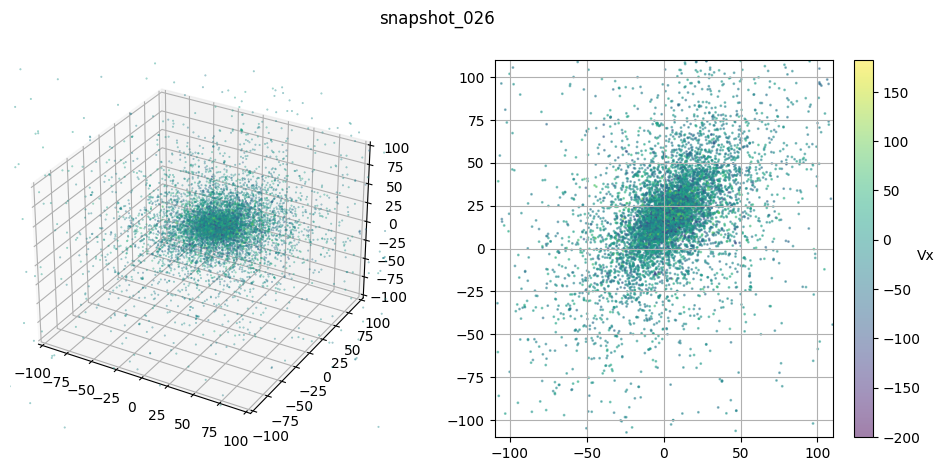

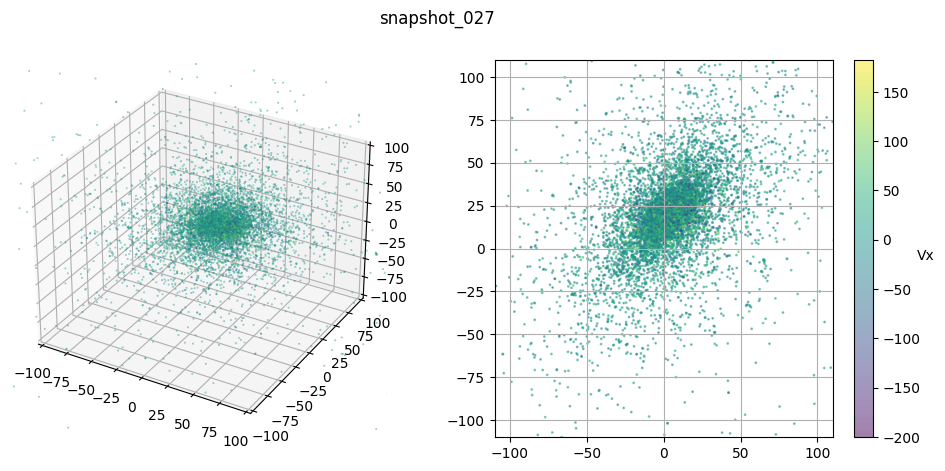

In [91]:
#Directory with data:
dirr = "project1/rotation"
datadir = dirr + "/n10000/"

#Creating folders for the output image.
dirname = 'tmp/'
!mkdir $dirname
exist = os.path.exists(dirname)
if exist=="False":
    os.mkdir(dirname)
else:
    os.remove

files = os.listdir(datadir+".")
files.sort()
for i,file in enumerate(files):    #Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
    f = h5py.File(datadir+file, "r")
    group = f["PartType1"]
    data = group["Coordinates"][()]
    vel = group["Velocities"][()]
    
    #Plotting the initial conditions of both galaxies:
    fig = plt.figure(figsize=(12,5),dpi=100)
    fig.suptitle(file[:-5])


    # 1st subplot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plot1 = ax.scatter3D(data[:,0],data[:,1],data[:,2],c=vel[:,0],cmap="viridis",s=0.2,alpha=0.5)
    ax.set_xlim(-100,100)
    ax.set_ylim(-100,100)
    ax.set_zlim(-100,100)


    # 2nd subplot
    ax = fig.add_subplot(1, 2, 2)
    ax.grid()
    ax.scatter(data[:,0],data[:,1],s=1,c=vel[:,0],cmap="viridis",alpha=0.5)
    cbar = fig.colorbar(plot, ax = ax)
    cbar.set_label('Vx', rotation=0)
    ax.set_xlim(-110,110)
    ax.set_ylim(-110,110)
    plt.savefig(dirname+str(i)+".png", bbox_inches = 'tight')
    plt.show()


In [92]:
#ANIMATION:
im1 = Image.open('tmp/0.png')
images = []

for k in range(1, 28):
    path = "tmp/" + str(k) + ".png"
    images.append(Image.open(path))

im1.save(dirr+"/n10000.gif", save_all=True, append_images=images, duration=200, loop=2)
!rm -r tmp/